# Principal Component Analysis

## Task

- In the Portland Housing Prices/Sales dataset Jul 2020 - Jul 2021, determine if there is a multicollinearity problem.
- Perform a principal component analysis
- Create a linear model from PCA and compare the model to the previous exercise

# Data loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv ("..\dataset\portland_filtered.csv",  sep=';')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Victor\AppData\Local\Temp\ipykernel_11892\2783883908.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv ("..\dataset\portland_filtered.csv",  sep=';')


# Analysis
- show data
- solve NaN values
- display basic data statistics
- show correlation matrix

Data Head:
    bathrooms  bedrooms  livingArea  age    price
0          3         5        3470    7  1165000
1          4         5        3374   85  1050000
2          3         3        3265   20   442500
3          3         3        3192   36   765000
4          3         4        3157   73   815000
NaN values before drop: 0

Basic Statistics:
         bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.000000    6.000000  3470.000000  114.00000  1.165000e+06


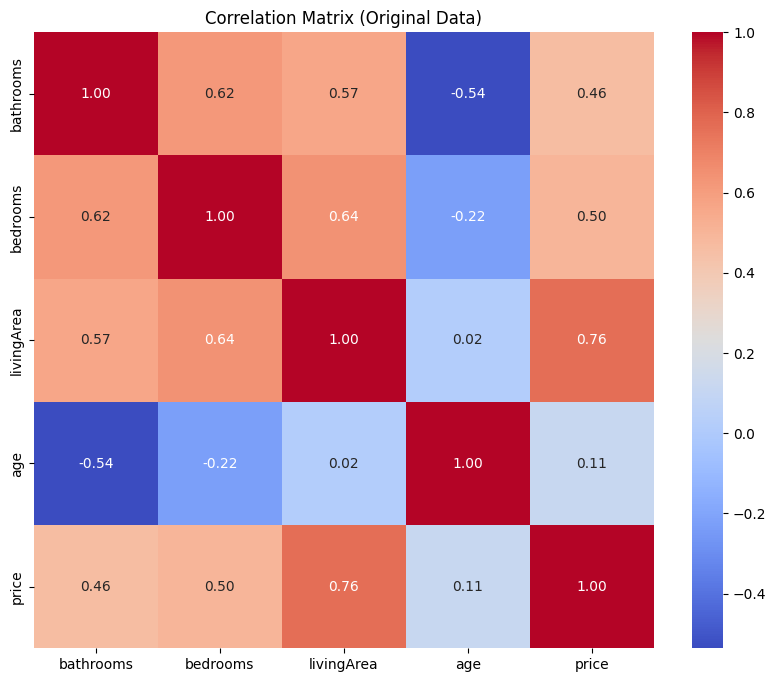

In [4]:
# Show data
print("Data Head:\n", data.head())

# Solve NaN values (Dropping them for simplicity in this task)
print(f"NaN values before drop: {data.isna().sum().sum()}")
data = data.dropna()

# Display basic data statistics
print("\nBasic Statistics:\n", data.describe())

# Show correlation matrix (Original Data)
plt.figure(figsize=(10, 8))
# Filter only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Original Data)")
plt.show()

# Data preparation
- select X variables bathrooms', 'bedrooms', 'livingArea','age','price'
- standardize the variables

In [5]:
# Select X variables: 'bathrooms', 'bedrooms', 'livingArea', 'age'
# Select y variable: 'price'
features = ['bathrooms', 'bedrooms', 'livingArea', 'age']
target = 'price'

# Filter to ensure columns exist
features = [f for f in features if f in data.columns]

X = data[features]
y = data[target]

# Standardize the variables
# Standardization is crucial before PCA so features with large scales don't dominate
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for VIF calculation readability
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("Data standardized.")

Data standardized.


# Display the VIF for each variable

In [6]:
# Calculating VIF manually using sklearn LinearRegression
# Formula: VIF = 1 / (1 - R_squared)
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_values = []

for feature in features:
    # 1. Regress this feature against all others
    X_vif = X_scaled_df.drop(columns=[feature])
    y_vif = X_scaled_df[feature]
    
    model_vif = LinearRegression()
    model_vif.fit(X_vif, y_vif)
    
    # 2. Get R-squared
    r_squared = model_vif.score(X_vif, y_vif)
    
    # 3. Calculate VIF
    if r_squared == 1.0:
        vif = float('inf') # Perfect correlation
    else:
        vif = 1 / (1 - r_squared)
        
    vif_values.append(vif)

vif_data["VIF"] = vif_values
print(vif_data)

      Feature       VIF
0   bathrooms  2.857373
1    bedrooms  2.036889
2  livingArea  2.303777
3         age  1.798314


# PCA
- Perform PCA
- show correlation matrix

Explained Variance Ratio: [0.58998819 0.27082568 0.08674934 0.05243678]


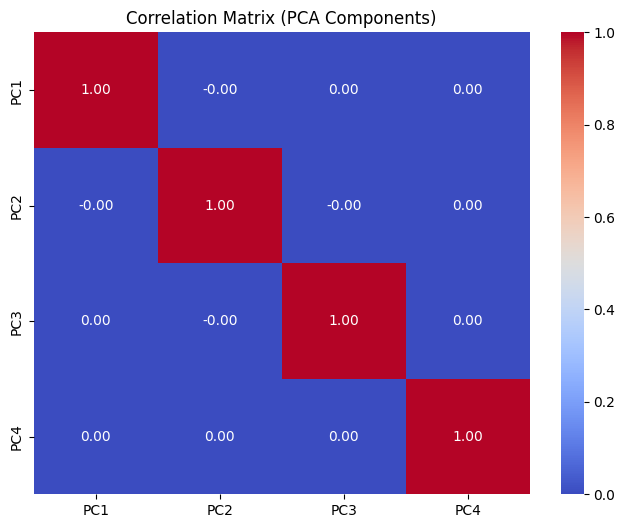

In [7]:
# Perform PCA
# We keep n_components equal to the number of features to see full variance initially
pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Show correlation matrix (PCA Components)
# Converting PCA result to DataFrame for visualization
pca_columns = [f'PC{i+1}' for i in range(len(features))]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

plt.figure(figsize=(8, 6))
sns.heatmap(df_pca.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (PCA Components)")
plt.show()

# Linear model
- Create and train a Linear Model for PCA variables
- Show R2 and RMSE

In [8]:
# Split the PCA transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the modeL
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Show R2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model R2 Score: {r2:.4f}")
print(f"Model RMSE: {rmse:.2f}")

Model R2 Score: 0.4425
Model RMSE: 148294.07
